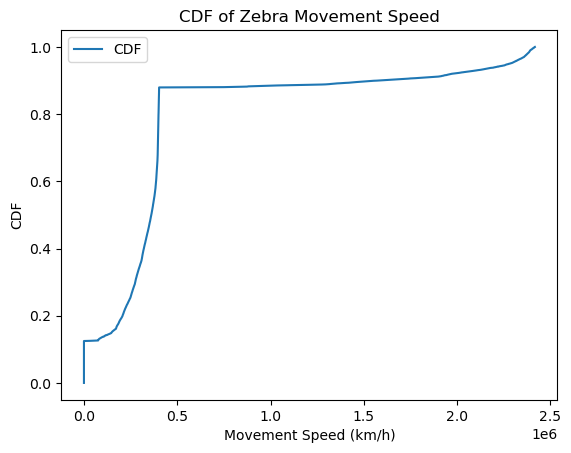

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import json


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def calculate_movement_speed(animal_data):
    speeds = []

    for animal in animal_data:
        if (animal["animal_type"] == "Zebra"):
            locations = [entry['location'] for entry in animal['data']]
            timestamps = [entry['Timestamp'] for entry in animal['data']]
            for i in range(1, len(locations)):
                lat1, lon1 = locations[i - 1]
                lat2, lon2 = locations[i]
                distance = haversine(lat1, lon1, lat2, lon2)  # in km
                time_diff = timestamps[i] - timestamps[i - 1]  # in seconds
                speed = distance / (time_diff / 3600)  # in km/h
                speeds.append(speed)

    return speeds

def plot_cdf(speeds):
    speeds = np.array(speeds)
    sorted_speeds = np.sort(speeds)
    cdf = np.arange(1, len(sorted_speeds) + 1) / len(sorted_speeds)

    plt.plot(sorted_speeds, cdf, label='CDF')
    plt.xlabel('Movement Speed (km/h)')
    plt.ylabel('CDF')
    plt.title('CDF of Zebra Movement Speed')
    plt.legend()
    plt.savefig("cdf_lion.jpg")
    plt.show()
    

if __name__ == '__main__':
    input_file_path = '30output.json'
    
    with open(input_file_path) as input_file:
        zebra_data = json.load(input_file)
    
    speeds = calculate_movement_speed(zebra_data)
    plot_cdf(speeds)


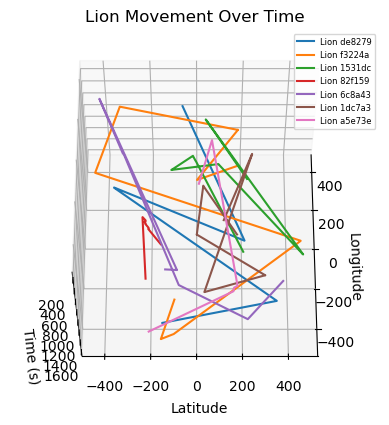

In [43]:
def plot_3d_movement(zebra_data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for zebra in zebra_data:
        if (zebra["animal_type"] == "Lion"):
            locations = np.array([entry['location'] for entry in zebra['data']])
            timestamps = np.array([entry['Timestamp'] for entry in zebra['data']])
            ax.plot(locations[:, 1], locations[:, 0], timestamps, label= zebra["animal_type"] + f" {zebra['ID']}")
        

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Time (s)')
    ax.set_title('Lion Movement Over Time')
    ax.legend(fontsize = 6)
    ax.view_init(-120, 0)
    plt.savefig("lion_move.png")
    plt.show()

plot_3d_movement(zebra_data)

In [4]:
def plot_histogram(data, xlabel, title):
    plt.hist(data, bins='auto', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

def plot_scatter(x_data, y_data, xlabel, ylabel, title):
    plt.scatter(x_data, y_data, alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def plot_box(data, labels, title):
    plt.boxplot(data, labels=labels)
    plt.title(title)
    plt.show()

def plot_heatmap(locations, title):
    plt.hist2d(locations[:, 1], locations[:, 0], bins=(100, 100), cmap=plt.cm.jet)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(label='Density')
    plt.title(title)
    plt.show()
    

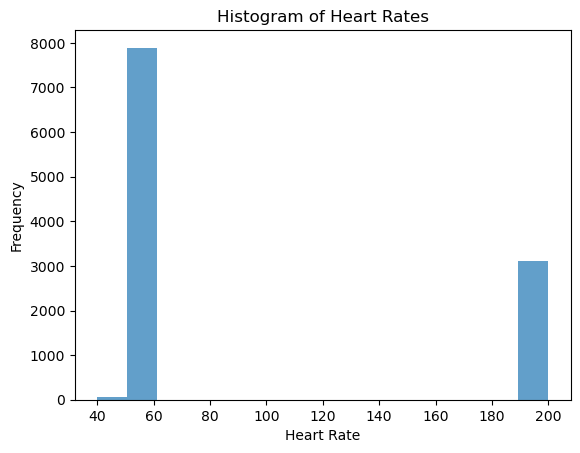

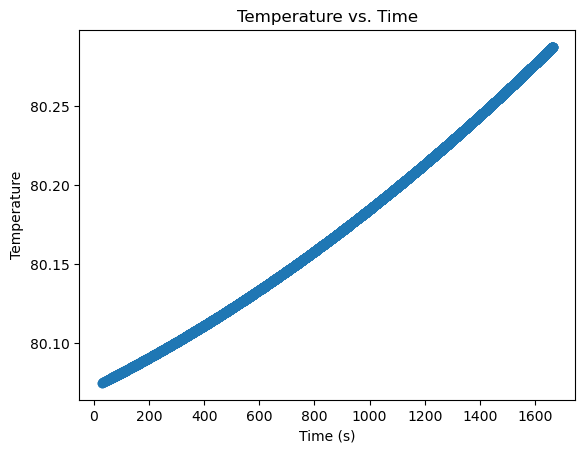

In [31]:

heart_rates = [entry['heart_rate'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']]
temperatures = [entry['temperature'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']]
oxygen_saturations = [entry['oxygen_saturation'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']]
light_intensities = [entry['light'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']]
timestamps = [entry['Timestamp'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']]
locations = np.array([entry['location'] for zebra in zebra_data if (zebra["animal_type"] == "Zebra") for entry in zebra['data']])

plot_histogram(heart_rates, 'Heart Rate', 'Histogram of Heart Rates')
plot_scatter(timestamps, temperatures, 'Time (s)', 'Temperature', 'Temperature vs. Time')


In [36]:
def plot_time_series(zebra_data):
    for zebra in zebra_data:
        if (zebra["animal_type"] == "Zebra"):
            zebra_id = zebra['ID']
            timestamps = np.array([entry['Timestamp'] for entry in zebra['data']])
            measurements = {
                'oxygen_saturation': np.array([entry['oxygen_saturation'] for entry in zebra['data']]),
                'heart_rate': np.array([entry['heart_rate'] for entry in zebra['data']]),
                'temperature': np.array([entry['temperature'] for entry in zebra['data']]),
            }

            for key, values in measurements.items():
                plt.plot(timestamps, values, label=key)

                plt.xlabel('Time (s)')
                plt.ylabel('Measurement')
                plt.title(key + f'VS time for Zebra {zebra_id}')
                plt.legend()
                plt.savefig(key + f'VS time for Zebra {zebra_id}')
                plt.show()

In [37]:
def plot_histograms(zebra_data):
    measurements = {
        'oxygen_saturation': [],
        'heart_rate': [],
        'temperature': [],
    }

    for zebra in zebra_data:
        for key in measurements.keys():
            measurements[key].extend([entry[key] for entry in zebra['data']])

    for key, values in measurements.items():
        plt.hist(values, bins=20, alpha=0.75, label=key)

        plt.xlabel('Measurement')
        plt.ylabel('Frequency')
        plt.title('Histograms of '+ key)
        plt.legend()
        plt.savefig('Histograms of '+ key)
        plt.show()

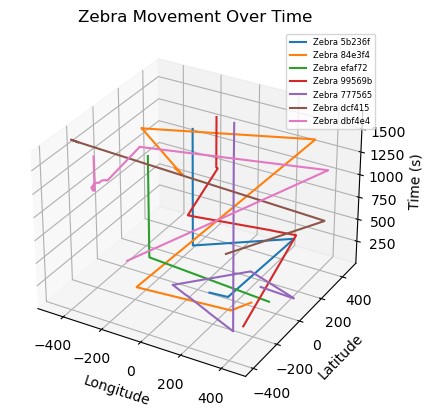

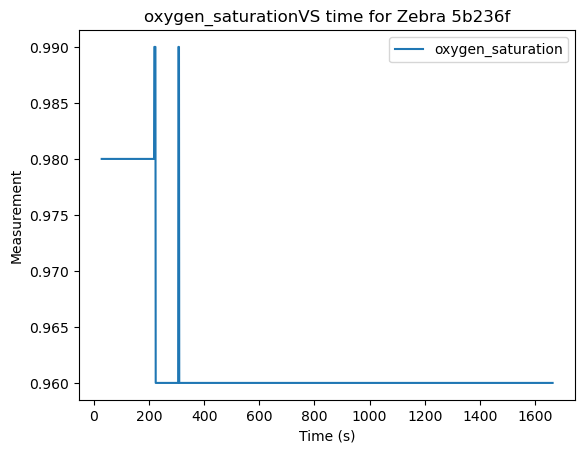

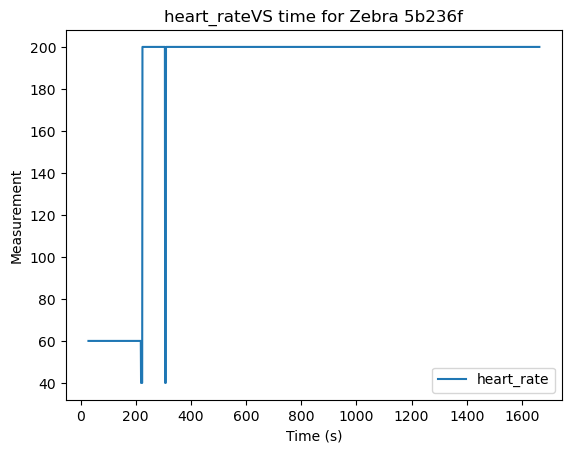

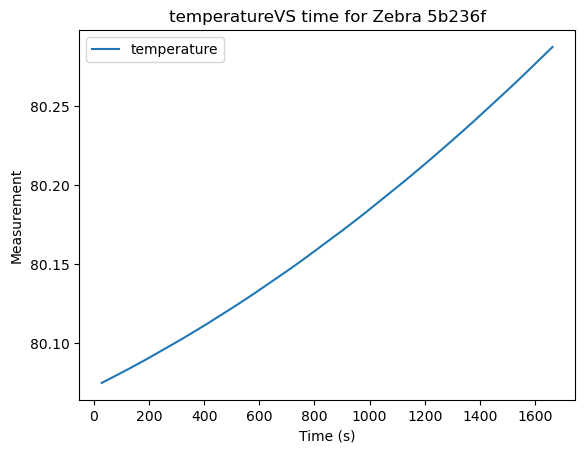

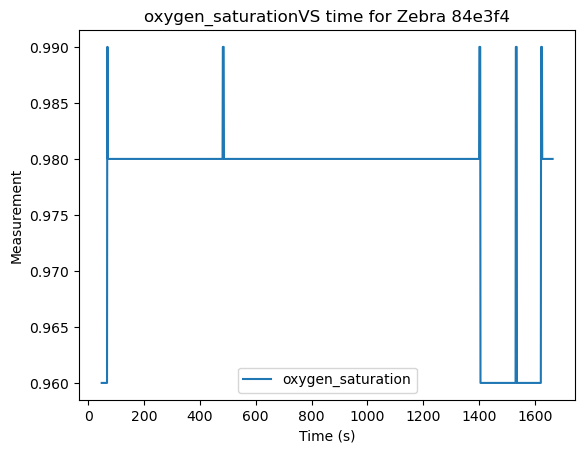

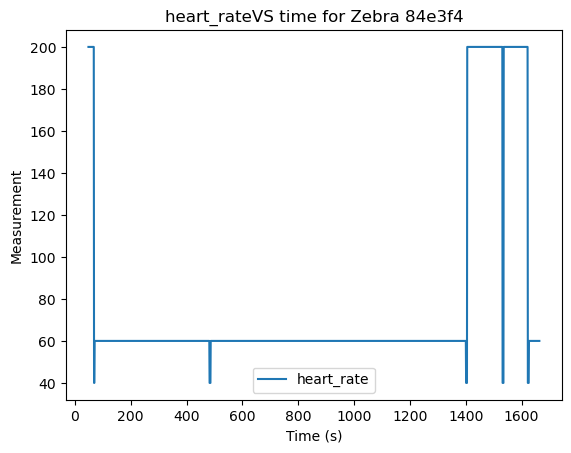

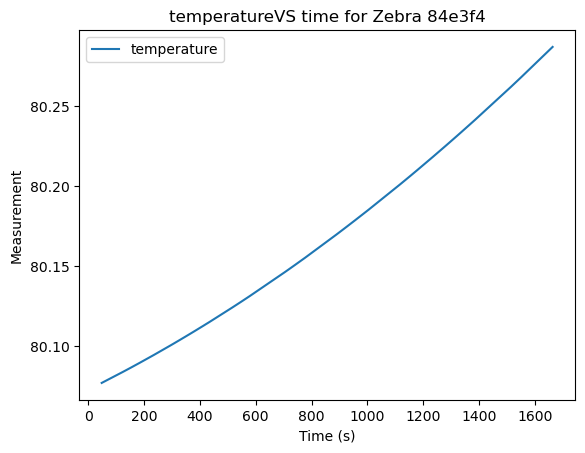

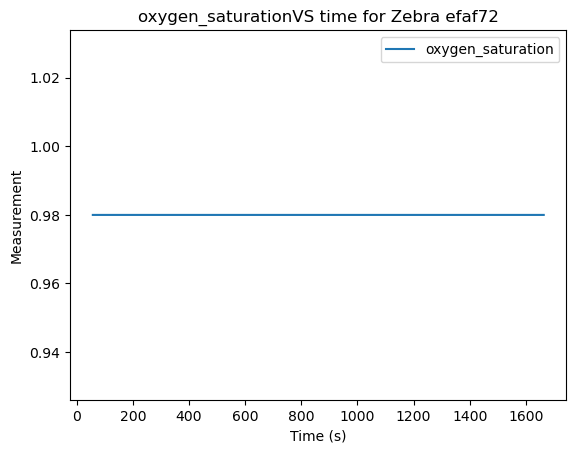

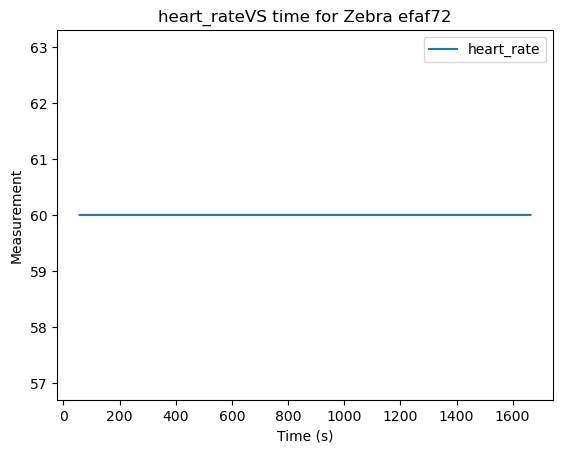

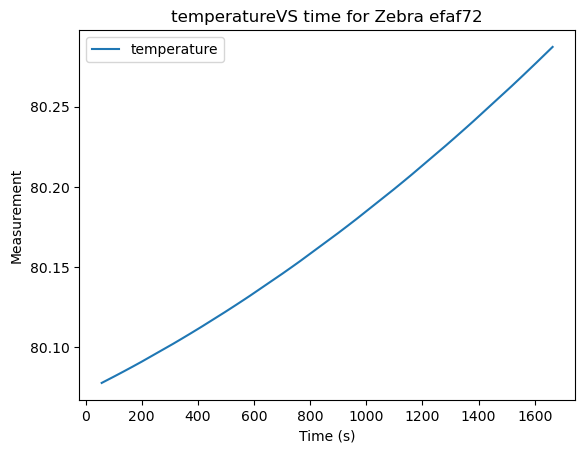

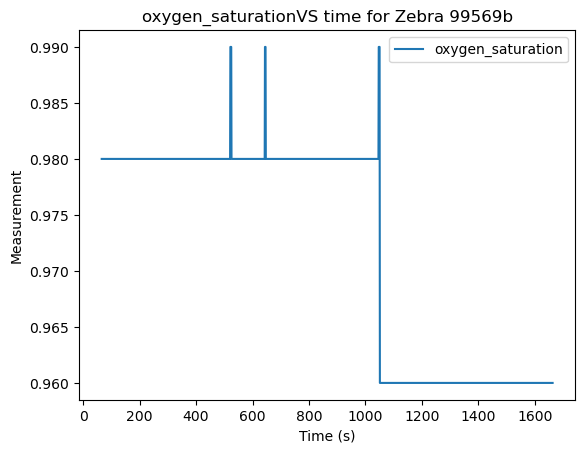

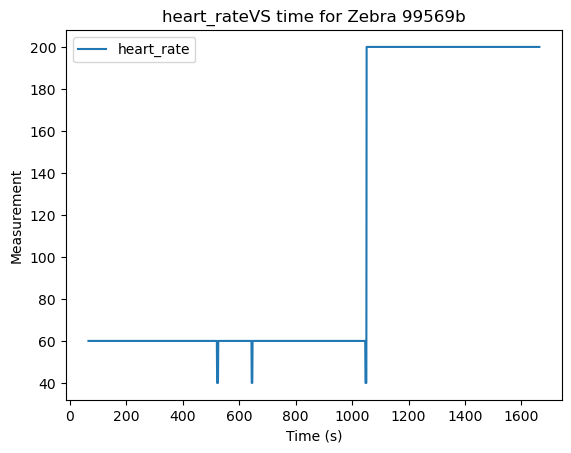

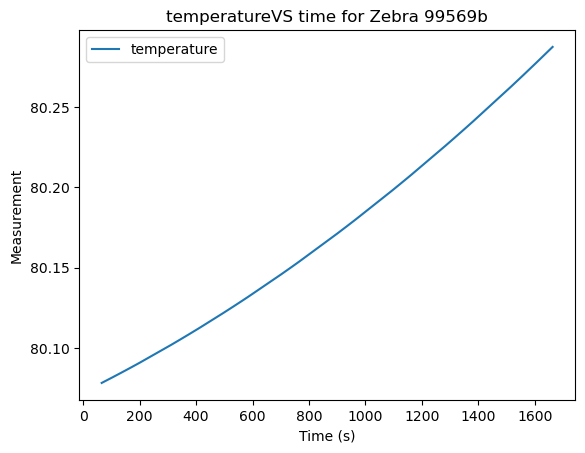

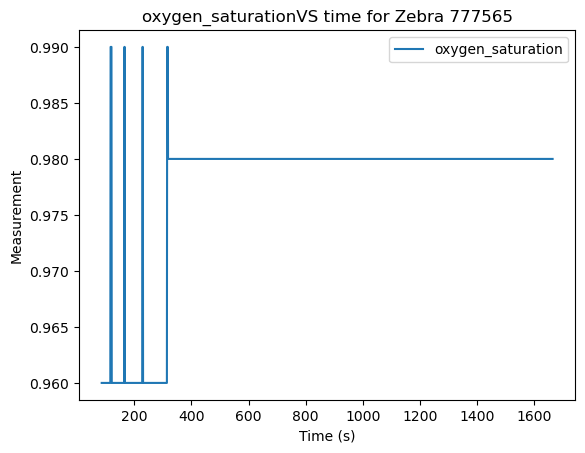

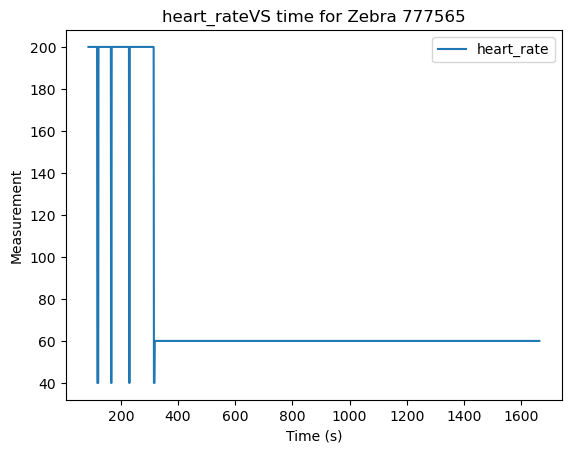

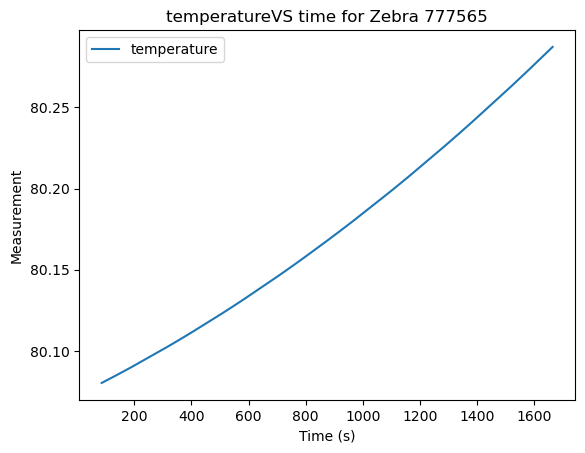

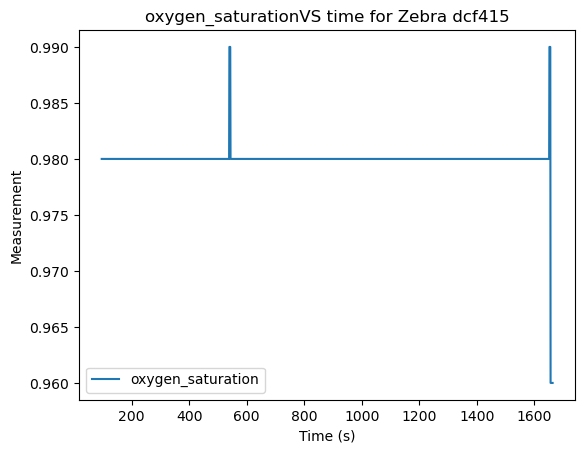

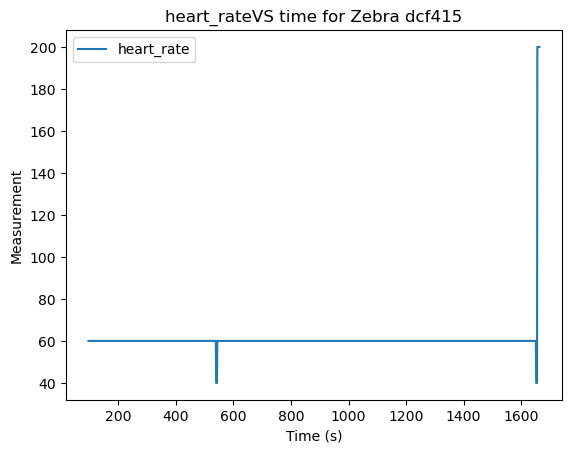

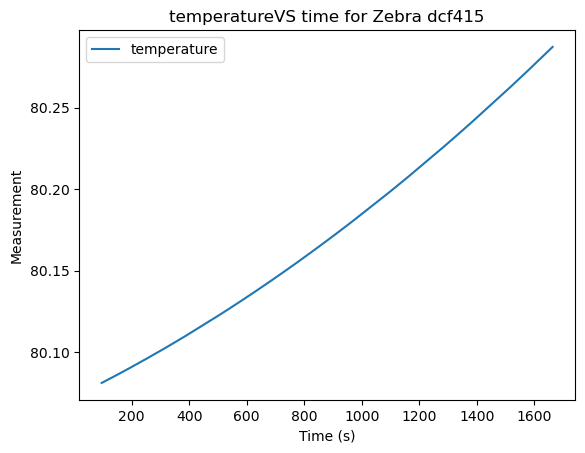

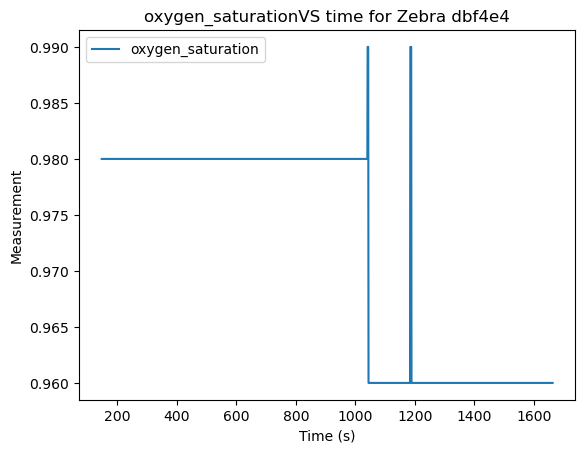

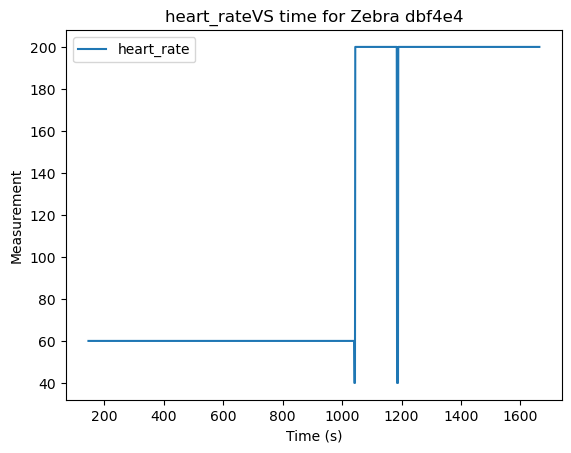

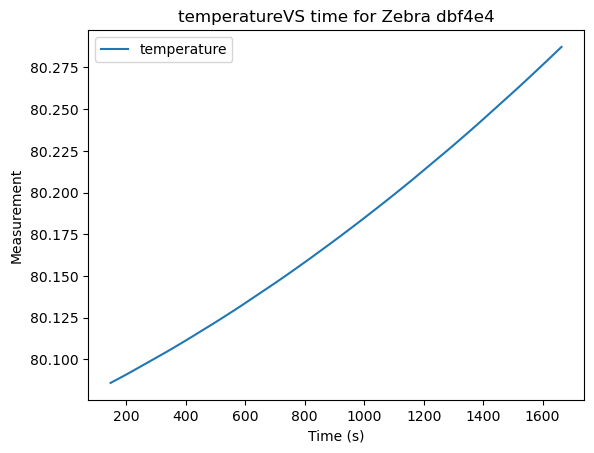

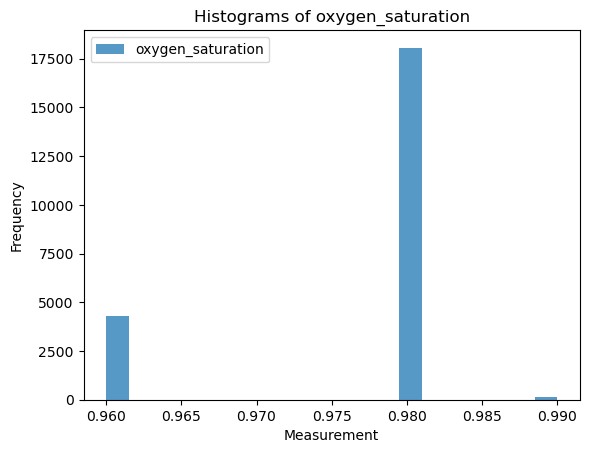

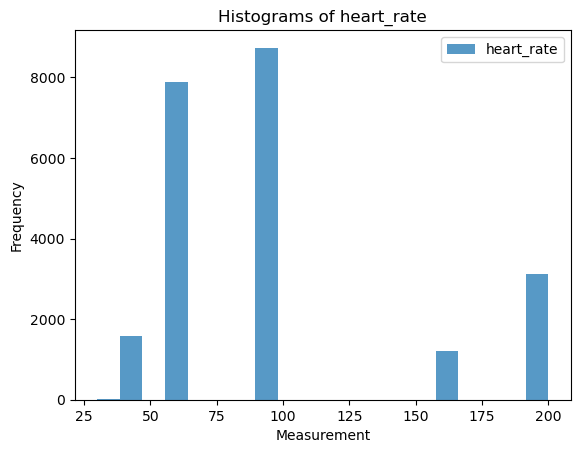

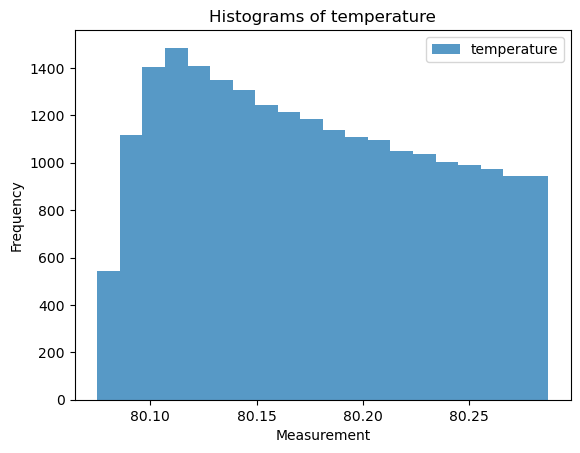

In [38]:
plot_3d_movement(zebra_data)
plot_time_series(zebra_data)
plot_histograms(zebra_data)